# Perceptron Example with the Iris Dataset

In this notebook, we will build a perceptron, one of the earliest neural network architectures, from scratch. The perceptron is a simple linear binary classifier. We will use the Iris dataset from the `sklearn.datasets` module to train a perceptron to classify two types of iris flowers: "Setosa" and "Versicolor".

## Step 1: Imports and Data Loading

We start by importing the necessary libraries and loading the Iris dataset.

In [2]:
import numpy as np  # Linear algebra operations
import pandas as pd  # Data handling
import seaborn as sns  # Visualization
import matplotlib.pyplot as plt  # Plotting

from sklearn.datasets import load_iris  # Dataset import
from sklearn.model_selection import train_test_split  # Splitting data
from sklearn.metrics import accuracy_score  # Model evaluation


Now let's load the Iris dataset and select two classes to create a binary classification problem.

In [3]:
# Load the Iris dataset
iris = load_iris()  # Iris dataset with multiple classes

# Select the first two features for simplicity
X = iris.data[:, :2]



# Step 2: Data Preprocessing
We need to preprocess the data by splitting it into training and testing sets, then standardizing it for better convergence during training.



In [4]:
# Convert target to binary: class 0 vs. all other classes
y = (iris.target != 0) * 1  # This makes it a binary classification problem

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Step 3: Building the Perceptron Class
Next, we create a simple perceptron class that includes an activation function, a training function, and a prediction function.

In [5]:
# Define a Perceptron class with learning rate and epochs
class Perceptron:
    def __init__(self, learning_rate=0.01, epochs=100):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.bias = None
    
    def fit(self, X, y):
        # Initialize weights and bias
        n_samples, n_features = X.shape
        self.weights = np.zeros(n_features)  # Initialize weights to zeros
        self.bias = 0  # Bias initialized to zero

        # Training loop
        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                linear_output = np.dot(x_i, self.weights) + self.bias  # Calculate linear combination
                y_predicted = np.where(linear_output >= 0, 1, 0)  # Activation function (step function)

                # Update weights and bias based on prediction error
                update = self.learning_rate * (y[idx] - y_predicted)
                self.weights += update * x_i
                self.bias += update  # Adjust bias
    
    def predict(self, X):
        # Make predictions based on trained weights and bias
        linear_output = np.dot(X, self.weights) + self.bias
        return np.where(linear_output >= 0, 1, 0)  # Step function to classify


# Step 4: Training the Perceptron
Now we train the perceptron using the training data.

In [6]:
# Create and train the perceptron
perceptron = Perceptron(learning_rate=0.01, epochs=100)  # Initialize perceptron
perceptron.fit(X_train, y_train)  # Train the perceptron

# Test the perceptron with the test dataset
y_pred = perceptron.predict(X_test)  # Make predictions

# Evaluate the model's performance using accuracy
accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy
print("Perceptron Accuracy:", accuracy)


Perceptron Accuracy: 0.9777777777777777


# Step 5: Testing and Evaluating the Perceptron
Let's test the perceptron using the testing data and evaluate its performance with metrics like accuracy and confusion matrices.

In [7]:
# Test the perceptron with the test dataset
y_pred = perceptron.predict(X_test)  # Make predictions

# Evaluate the model's performance using accuracy
accuracy = accuracy_score(y_test, y_pred)  # Compute accuracy
print("Perceptron Accuracy:", accuracy)


Perceptron Accuracy: 0.9777777777777777


# Step 6: Visualizing the Decision Boundary
To better understand the perceptron's behavior, let's visualize the decision boundary with a scatter plot.

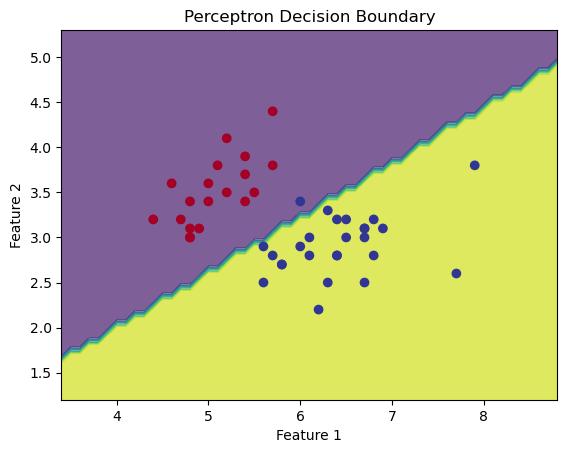

In [8]:
# Helper function to plot the decision boundary
def plot_decision_boundary(X, y, perceptron):
    # Generate a grid of points to plot the decision boundary
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1), np.arange(y_min, y_max, 0.1))
    
    # Predict over the grid
    grid_predictions = perceptron.predict(np.c_[xx.ravel(), yy.ravel()])
    grid_predictions = grid_predictions.reshape(xx.shape)
    
    # Plot the decision boundary
    plt.contourf(xx, yy, grid_predictions, alpha=0.7)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu)  # Original data
    plt.xlabel("Feature 1")
    plt.ylabel("Feature 2")
    plt.title("Perceptron Decision Boundary")
    plt.show()

# Plot the decision boundary with the trained perceptron
plot_decision_boundary(X_test, y_test, perceptron)


# Step 7: Evaluation

In [9]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

# Calculate metrics for the perceptron model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)


Accuracy: 0.9777777777777777
Precision: 1.0
Recall: 0.9615384615384616
F1-Score: 0.9803921568627451


Error analysis is a crucial step when evaluating machine learning models, such as the perceptron algorithm, which we built earlier. By examining where the perceptron makes errors, we can gain insights into improving the model's accuracy and generalization. Let's consider various metrics and approaches to analyze errors for the perceptron model.

# Error Analysis for the Perceptron Model
# Model Overview
Recall that the perceptron is a binary linear classifier that predicts an outcome (e.g., positive or negative) based on a weighted sum of inputs. The perceptron updates its weights based on errors encountered during training.
# Performance Metrics
Performance metrics are vital to understand how well the perceptron is performing. We can use metrics such as accuracy, precision, recall, and F1-score to evaluate the model.